# Tarea 10.9
Valentina Martínez Garrido 20925164-7

En el ejemplo de Fashion MNIST, use dos capas escondidas con 20 neuronas cada una en vez de las dos capas usadas en clase. Explique los resultados obtenidos.

In [1]:
import jax.numpy as jnp
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from jax import random
from jax import jit
from jax import grad

In [15]:
#Cargar el dataset de Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
#Normalizamos los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
#Convertit las imagenes a formato para el MLP
train_images = jnp.array(train_images.reshape(-1, 28 * 28))
test_images = jnp.array(test_images.reshape(-1, 28 * 28))
train_labels = jnp.array(train_labels)
test_labels = jnp.array(test_labels)

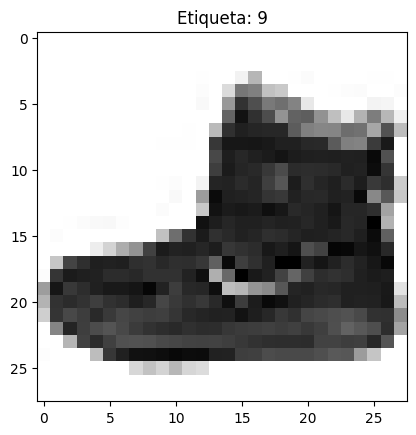

In [18]:
#Visualizar imagen de ejemplo
plt.imshow(train_images[0].reshape([28, 28]), cmap='gray_r')
plt.title(f"Etiqueta: {train_labels[0]}")
plt.show()

In [28]:
#Función ReLU
@jit
def relu(z):
  return jnp.maximum(0, z)

#Funcion Softmax para la salida de clasificación
@jit
def softmax(z):
  exp_z = jnp.exp(z)
  return exp_z / jnp.sum(exp_z, axis=-1, keepdims=True)

  #Definir MLP con una capa oculta de 20 neuronas cada una
  def mlp(params, x):
    w1, b1, w2, b2, w3, b3 =  params
    #Primera caoa oculta
    z1 = jnp.dot(x, w1) + b1
    a1 = relu(z1)
    #Segunda capa
    z2 = jnp.dot(a1, w2) + b2
    a2 = relu(z2)
    #Capa de salida
    z3 =jnp.dot(a2, w3) + b3
    return softmax(z3)

  # Inicialización de pesos y sesgos
def inicializar_pesos(rng, input_size, hidden_sizes, output_size):
    w1 = random.normal(rng, (input_size, hidden_sizes[0])) * 0.01
    b1 = jnp.zeros((hidden_sizes[0],))
    w2 = random.normal(rng, (hidden_sizes[0], hidden_sizes[1])) * 0.01
    b2 = jnp.zeros((hidden_sizes[1],))
    w3 = random.normal(rng, (hidden_sizes[1], output_size)) * 0.01
    b3 = jnp.zeros((output_size,))
    return w1, b1, w2, b2, w3, b3

# Definir tamaños de la red
input_size = 28 * 28  # Tamaño de la imagen aplanada
hidden_sizes = [20, 20]  # Capas ocultas de 20 neuronas
output_size = 10  # Número de clases
# Inicializar parámetros
rng = random.PRNGKey(0)
params = inicializar_pesos(rng, input_size, hidden_sizes, output_size)

# Función de pérdida (Entropía Cruzada)
@jit
def cross_entropy_loss(params, x, y):
    preds = mlp(params, x)
    return -jnp.mean(jnp.sum(y * jnp.log(preds), axis=-1))

# Función para calcular la precisión
@jit
def accuracy(params, x, y):
    predictions = jnp.argmax(mlp(params, x), axis=1)
    return jnp.mean(predictions == y)

# Función de retropropagación y actualización de pesos
@jit
def actualizar_pesos(params, x, y, learning_rate=0.01):
    grads = grad(cross_entropy_loss)(params, x, y)
    params = [w - learning_rate * dw for w, dw in zip(params, grads)]
    return params
# Inicializar los parámetros
rng = random.PRNGKey(0)
input_size = 28 * 28
hidden_sizes = [20, 20]  # Dos capas ocultas de 20 neuronas cada una
output_size = 10
params = inicializar_pesos(rng, input_size, hidden_sizes, output_size)

# Parámetros de entrenamiento
epochs = 30
learning_rate = 0.01
batch_size = 64
accuracies = []

for epoch in range(epochs):
    # Dividir los datos en minibatches
    num_batches = len(train_images) // batch_size
    for i in range(num_batches):
        x_batch = train_images[i * batch_size : (i + 1) * batch_size]
        y_batch = jnp.eye(10)[train_labels[i * batch_size : (i + 1) * batch_size]]  # One-hot encoding

        # Actualizar los pesos usando el gradiente
        params = actualizar_pesos(params, x_batch, y_batch, learning_rate)

    # Evaluar precisión en el conjunto de prueba
    test_acc = accuracy(params, test_images, test_labels)
    accuracies.append(test_acc)
    print(f'Época {epoch + 1}, Precisión en test: {test_acc:.3f}')


Época 1, Precisión en test: 0.100
Época 2, Precisión en test: 0.114
Época 3, Precisión en test: 0.174
Época 4, Precisión en test: 0.355
Época 5, Precisión en test: 0.564
Época 6, Precisión en test: 0.617
Época 7, Precisión en test: 0.696
Época 8, Precisión en test: 0.716
Época 9, Precisión en test: 0.733
Época 10, Precisión en test: 0.744
Época 11, Precisión en test: 0.753
Época 12, Precisión en test: 0.764
Época 13, Precisión en test: 0.776
Época 14, Precisión en test: 0.783
Época 15, Precisión en test: 0.790
Época 16, Precisión en test: 0.795
Época 17, Precisión en test: 0.799
Época 18, Precisión en test: 0.802
Época 19, Precisión en test: 0.804
Época 20, Precisión en test: 0.807
Época 21, Precisión en test: 0.811
Época 22, Precisión en test: 0.813
Época 23, Precisión en test: 0.815
Época 24, Precisión en test: 0.817
Época 25, Precisión en test: 0.820
Época 26, Precisión en test: 0.821
Época 27, Precisión en test: 0.823
Época 28, Precisión en test: 0.826
Época 29, Precisión en test: 

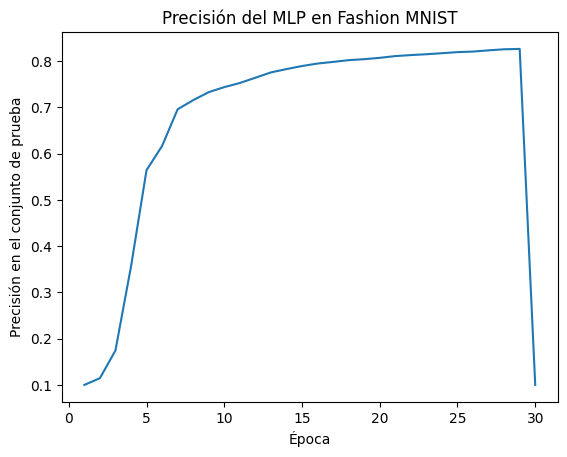

In [29]:
# Graficar la precisión en el conjunto de prueba
plt.plot(np.arange(len(accuracies)) + 1, accuracies)
plt.xlabel("Época")
plt.ylabel("Precisión en el conjunto de prueba")
plt.title("Precisión del MLP en Fashion MNIST")
plt.show()